## Solutions for internship assignment

### Use case 1: National Achievement Survey

#### problems: 
1. What influences students performance the most
2. How do boys and girls perform across states
3. Do students from South Indian states really excel at Math and Science ?

In [1]:
## Loading libraries
import pandas as pd    ## for data manipulation
import numpy as np     ## for array and matrices operations
import bokeh   ## For interactive visualizations
import matplotlib.pyplot as plt 
import os
import geopandas as gpd                 # For plotting maps
from bokeh.plotting import figure, show  # For interactive visualization
from bokeh.io import output_notebook

ImportError: libicui18n.so.56: cannot open shared object file: No such file or directory

In [2]:
### Loading the data
import os

path = os.path.join('G:\Internship_assignment','DistrictCensus.csv')

data = pd.read_csv(path)


In [1]:
data.head(5)

NameError: name 'data' is not defined

In [48]:
data

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
5,6,JAMMU & KASHMIR,Rajouri,642415,345351,297064,364109,224469,139640,48157,...,120,443,42,58,100,72,22,94,15,786
6,7,JAMMU & KASHMIR,Kathua,616435,326109,290326,389204,228499,160705,141224,...,174,514,54,69,123,78,52,130,28,936
7,8,JAMMU & KASHMIR,Baramula,1008039,534733,473306,545149,337170,207979,1476,...,254,1049,155,190,345,177,78,255,64,2100
8,9,JAMMU & KASHMIR,Bandipore,392232,207680,184552,185979,117058,68921,392,...,11,29,2,2,4,3,3,6,0,45
9,10,JAMMU & KASHMIR,Srinagar,1236829,651124,585705,748584,431746,316838,1068,...,668,1095,319,380,699,240,370,610,445,3099


In [4]:
# understanding the data 

for i in data.columns:
    print('{}: {}\n'.format(i, data[i].dtype))

District code: int64

State name: object

District name: object

Population: int64

Male: int64

Female: int64

Literate: int64

Male_Literate: int64

Female_Literate: int64

SC: int64

Male_SC: int64

Female_SC: int64

ST: int64

Male_ST: int64

Female_ST: int64

Workers: int64

Male_Workers: int64

Female_Workers: int64

Main_Workers: int64

Marginal_Workers: int64

Non_Workers: int64

Cultivator_Workers: int64

Agricultural_Workers: int64

Household_Workers: int64

Other_Workers: int64

Hindus: int64

Muslims: int64

Christians: int64

Sikhs: int64

Buddhists: int64

Jains: int64

Others_Religions: int64

Religion_Not_Stated: int64

LPG_or_PNG_Households: int64

Housholds_with_Electric_Lighting: int64

Households_with_Internet: int64

Households_with_Computer: int64

Rural_Households: int64

Urban_Households: int64

Households: int64

Below_Primary_Education: int64

Primary_Education: int64

Middle_Education: int64

Secondary_Education: int64

Higher_Education: int64

Graduate_Educa

In [5]:
# list of all the categorical and numerical variables
cat_var = [i for i in data.columns if data[i].dtype==object]


In [6]:
cat_var

['State name', 'District name']

In [7]:
data[cat_var[0]] = data[cat_var[0]].astype('category')
data[cat_var[1]] = data[cat_var[1]].astype('category')

### Calculating the literacy rate statewise

In [8]:
# calculate total number of literate people statewise
lit_pop = data.groupby('State name')['Literate'].agg('sum')
tot_pop = data.groupby('State name')['Population'].agg('sum')

In [9]:
lit_rate = (lit_pop/tot_pop)*100


In [10]:
## Printing top 10 states with lowest literacy rate

lit_rate.sort_values().head(10)

State name
BIHAR                50.436916
ARUNACHAL PRADESH    55.358102
JHARKHAND            55.559581
RAJASTHAN            55.836841
JAMMU & KASHMIR      56.351669
UTTAR PRADESH        57.252497
MADHYA PRADESH       59.001861
ANDHRA PRADESH       59.773345
MEGHALAYA            60.164199
CHHATTISGARH         60.206705
dtype: float64

In [11]:
long_info = [87.479,93.616,86.419,74.639,74.466,78.05,76.130,78.570,91.88,82.159]
lat_info = [25.785,27.1,23.8,26.44,34.299,27.599,21.300,14.75,25.57,22.09]
d = {'State':lit_rate.head(10).index.values,'long':long_info, 'lat': lat_info}
geo_info = pd.DataFrame(d)

In [13]:
## Reading the shape files for plotting state boundaries of India.
path1 = './INDIA.shx'
india = gpd.read_file(path1)

In [42]:
india.head()

,ST_NAME,geometry,lit_rate
0,ANDAMAN AND NICOBAR ISLANDS,"(POLYGON ((92.898888 12.915831, 92.89917 12.91...",77.324144
1,Andhra Pradesh,"POLYGON ((83.943192 18.214308, 83.942359999999...",59.773345
2,Arunachal Pradesh,"POLYGON ((94.86086299999999 27.739479, 94.8660...",55.358102
3,Assam,"POLYGON ((95.59916699999999 27.22961, 95.59008...",61.456892
4,Bihar,"POLYGON ((87.955612 25.53805, 87.952393 25.536...",50.436916


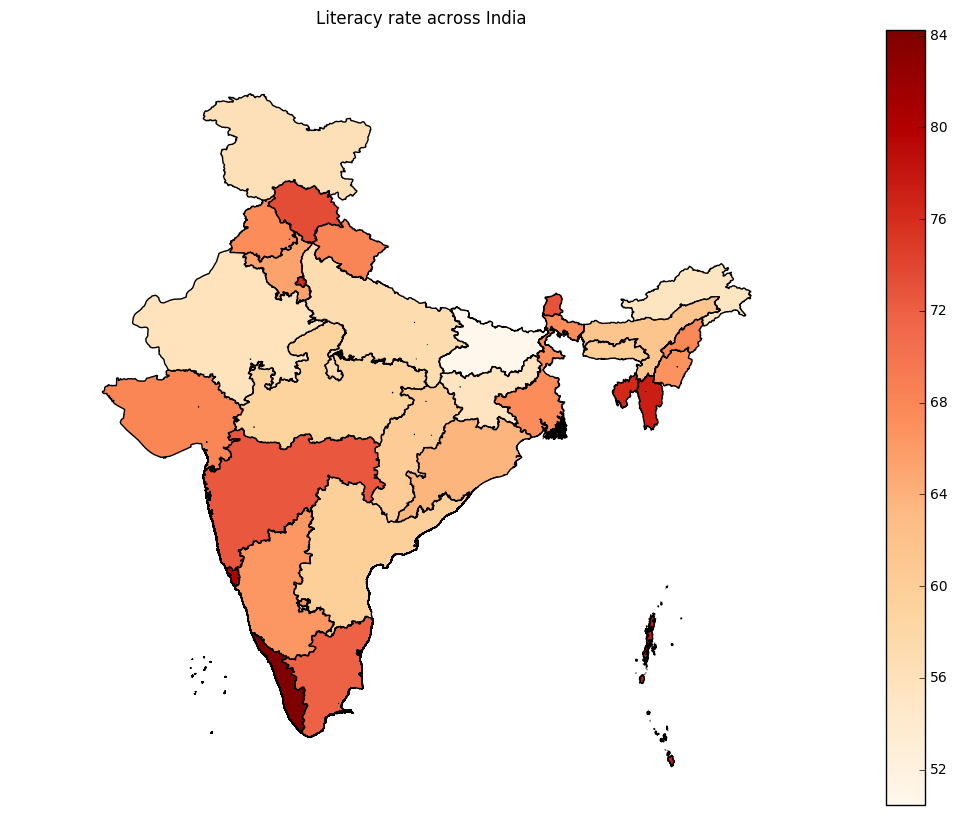

In [43]:
india['lit_rate'] = lit_rate.values
india.plot(column = 'lit_rate', figsize=(20,10),cmap='OrRd',legend=True)
plt.axis('off')
plt.title('Literacy rate across India')
plt.show()

## Finding the most simillar districts based on the given parameter

In [90]:
# Here is the function to calculate absolute simillarity between Bihar and TamilNadu based on any single dimension parameter.

def Simillarity(param):
    
    B_dist = data[data['State name']== 'BIHAR']
    B_dist_p = B_dist[['District name',param]]

    T_dist = data[data['State name']=='TAMIL NADU']
    T_dist_p = T_dist[['District name',param]]

    
    simillar = []

    for l,i in enumerate(T_dist_p[param].values):
        temp = np.zeros(len(B_dist_p))
        for k,j in enumerate(B_dist_p[param].values):
            temp[k] = abs(i-j)
        m = np.argmin(temp)

        simillar.append((l,m))
    
    d2 = B_dist_p['District name']
    d1 = T_dist_p['District name']

    simillar_dist = [(d1.iloc[i[0]], d2.iloc[i[1]]) for i in simillar]
    
    return simillar_dist


        
Simillarity('Total_Power_Parity')        

[('Thiruvallur', 'Patna'),
 ('Chennai', 'Patna'),
 ('Kancheepuram', 'Patna'),
 ('Vellore', 'Patna'),
 ('Tiruvannamalai', 'Muzaffarpur'),
 ('Viluppuram', 'Muzaffarpur'),
 ('Salem', 'Patna'),
 ('Namakkal', 'Saran'),
 ('Erode', 'Patna'),
 ('The Nilgiris', 'Araria'),
 ('Dindigul', 'Muzaffarpur'),
 ('Karur', 'Aurangabad'),
 ('Tiruchirappalli', 'Patna'),
 ('Perambalur', 'Jehanabad'),
 ('Ariyalur', 'Khagaria'),
 ('Cuddalore', 'Muzaffarpur'),
 ('Nagapattinam', 'Siwan'),
 ('Thiruvarur', 'Aurangabad'),
 ('Thanjavur', 'Muzaffarpur'),
 ('Pudukkottai', 'Bhagalpur'),
 ('Sivaganga', 'Katihar'),
 ('Madurai', 'Patna'),
 ('Theni', 'Purnia'),
 ('Virudhunagar', 'Muzaffarpur'),
 ('Ramanathapuram', 'Begusarai'),
 ('Thoothukkudi', 'Saran'),
 ('Tirunelveli', 'Patna'),
 ('Kanniyakumari', 'Muzaffarpur'),
 ('Dharmapuri', 'Gopalganj'),
 ('Krishnagiri', 'Pashchim Champaran'),
 ('Coimbatore', 'Patna'),
 ('Tiruppur', 'Patna')]

In [93]:
data2 = data[['Households_with_Telephone_Mobile_Phone_Mobile_only','Agricultural_Workers']]

In [94]:
data2.head()

,Households_with_Telephone_Mobile_Phone_Mobile_only,Agricultural_Workers
0,53437,56759
1,65783,36630
2,6331,1645
3,7733,3763
4,31773,31583


In [110]:
# Visualising the scatter plot between mobile penetrations and Agricultural_workers
y = data2['Households_with_Telephone_Mobile_Phone_Mobile_only'].values
x = data2['Agricultural_Workers'].values
p = figure(title="Mobile penetration among agricultural workers",toolbar_location=None)
p.grid.grid_line_color = None
p.scatter(x, y,marker='circle',fill_color='firebrick',
         line_color='red',alpha=0.8)
output_notebook()
show(p)

Loading BokehJS ...

In [5]:
import shapefile

In [7]:
%ls

Assignment_1.ipynb  india-districts-census-2011.csv  INDIA.shp  INDIA.shx


In [8]:
shapefile.Reader('INDIA.shx')

ShapefileException: Unable to open INDIA.dbf or INDIA.shp.

/home/bhumihar/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


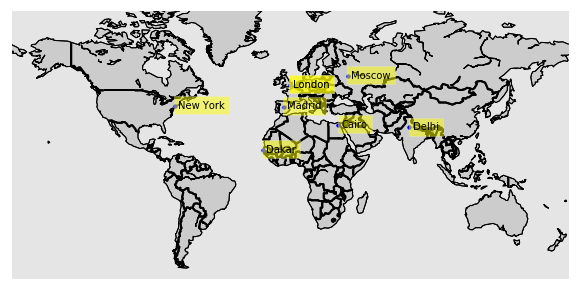

ValueError: Image size of -1873480084x-293584076 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of -1805527448x-307193271 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 360668987x-733302886 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 757071847x406943884 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of -1080086229x-790554589 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1635469839x-1320268453 pixels is too large. It must be less than 2^16 in each direction.

In [4]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import numpy as np
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

m = Basemap(projection='mill',
            llcrnrlon=-180. ,llcrnrlat=-60,
            urcrnrlon=180. ,urcrnrlat=80.)

cities = ['London', 'New York', 'Madrid', 'Cairo', 'Moscow',
          'Delhi', 'Dakar']
lat = [51.507778, 40.716667, 40.4, 30.058, 55.751667,
       28.61, 14.692778]
lon = [-0.128056, -74, -3.683333, 31.229, 37.617778,
       77.23, -17.446667]

x, y = m(lon, lat)

m.drawcoastlines()
m.fillcontinents()
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
#m.drawstates()

plt.plot(x, y, 'b.')

for city, xc, yc in zip(cities, x, y):
    
# draw the city name in a yellow (shaded) box

    plt.text(xc+250000, yc-150000, city,bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()

In [5]:
import pandas as pd
dist = pd.read_csv('lat_lon.csv')

In [6]:
dist.head()

,Unnamed: 0,Latitude,Location,Longitude
0,0,26°24'N,Abhayapuri,90°38'E
1,1,10°59'N,Karaikal,79°50'E
2,2,30°10'N,Abohar,74°10'E
3,3,10°05'N,Karaikkudi,78°45'E
4,4,24°41'N,Abu,72°50'E


In [8]:
data = pd.read_csv('india_2011.csv')

In [9]:
guj_demography = data[data['State name']=='GUJARAT']
guj_demography = guj_demography[['District name','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated']]

In [10]:
guj_demography.rename(columns={'Others_Religions':'Others'},inplace=True)

In [12]:
guj_demography

,District name,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others,Religion_Not_Stated
467,Kachchh,1608921,442355,6192,6353,490,25312,98,2650
468,Banas Kantha,2890305,213505,1686,486,281,12659,83,1501
469,Patan,1194745,142797,916,337,66,3602,66,1205
470,Mahesana,1885732,136431,1954,1082,146,7087,88,2544
471,Sabar Kantha,2260560,148563,6375,614,168,11110,52,1147
472,Gandhinagar,1319586,57273,3237,1985,497,6405,82,2688
473,Ahmadabad,6042416,883238,50754,14542,4518,209287,2055,7415
474,Surendranagar,1620282,109681,1419,512,312,22992,128,942
475,Rajkot,3397406,361388,5478,1918,1170,33591,269,3338
476,Jamnagar,1810443,320805,4392,1873,1086,18856,136,2528


In [13]:
dist.count()

Unnamed: 0    1636
Latitude      1636
Location      1636
Longitude     1636
dtype: int64

In [15]:
guj_demography['District name'].unique()

array(['Kachchh', 'Banas Kantha', 'Patan', 'Mahesana', 'Sabar Kantha',
       'Gandhinagar', 'Ahmadabad', 'Surendranagar', 'Rajkot', 'Jamnagar',
       'Porbandar', 'Junagadh', 'Amreli', 'Bhavnagar', 'Anand', 'Kheda',
       'Panch Mahals', 'Dohad', 'Vadodara', 'Narmada', 'Bharuch',
       'The Dangs', 'Navsari', 'Valsad', 'Surat', 'Tapi'], dtype=object)

In [16]:

from urllib.request import urlopen
 
from bs4 import BeautifulSoup
import pandas as pd

In [18]:
html = urlopen("http://www.indianmirror.com/india-post/indianpincode.html")
html_data = BeautifulSoup(html, 'html.parser')

In [19]:
html_data

<!DOCTYPE html>

<html lang="en-US">
<head>
<link href="http://www.indianmirror.com/includes/im-mobileport.css" media="screen" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]>
<link rel="stylesheet" type="text/css" media="all" href="http://www.indianmirror.com/includes/im-mobileport-ie.css"/>
<![endif]-->
<title>Indian Pincode, Area code, List of Districts in India, Indian Districts </title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width" name="viewport"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Indian Pincode, Area code, List of Districts in India, Indian Districts, Population, Area Code, Pincode, Ddensity, Area, Districts, Union territories, Cities, Head quarters, Latitude and Longtitude, states, wet bengal, assam, andhra pradesh, jammu and kashmir, tamilnadu, mizroam, nagaland, manipur, maharashtra, delhi, bihar, goa, orissa, chhattisgarh" name="keywords">
<meta content

In [23]:
html_data.find_all('a')

[<a href="http://www.indianmirror.com/"><span class="hnavlink">Home</span> </a>,
 <a href="http://www.indianmirror.com/india-post/indianpincode.html"><span class="hnavlink"> India Post          </span></a>,
 <a href="" id="myTicker"></a>,
 <a onclick="changeFontSize('content','2');" onmouseover='this.style.cursor="pointer"' style="cursor:hand;font-weight:bold; color:#000000;">+</a>,
 <a onclick="changeFontSize('content',-2);" onmouseover='this.style.cursor="pointer"' style="cursor:hand"><span style="font-weight:bold; color:#000000;">  -</span></a>,
 <a href="http://www.indianmirror.com/india-post/indianpincode.html" style="color:#000000;">INDIAN PINCODE</a>,
 <a name="top"></a>,
 <a href="#andhra" style="color:#000000;">Andhra Pradesh </a>,
 <a href="#maha" style="color:#000000;">Maharashtra</a>,
 <a href="#arunachal" style="color:#000000;">Arunachal Pradesh </a>,
 <a href="#manipur" style="color:#000000;">Manipur</a>,
 <a href="#assam" style="color:#000000;">Assam</a>,
 <a href="#megh

In [24]:
html_data.a

<a href="http://www.indianmirror.com/"><span class="hnavlink">Home</span> </a>

In [26]:
html_data = html_data.body

In [28]:
html_data.find_all('td')

[<td bgcolor="#99CCFF" colspan="6"><div align="center"><strong>States</strong></div></td>,
 <td bgcolor="#99CCFF" height="20" row="" span="6"><strong>S.No</strong></td>,
 <td bgcolor="#99CCFF"><strong>State</strong></td>,
 <td bgcolor="#99CCFF"><strong>Dist</strong></td>,
 <td bgcolor="#99CCFF"><strong>S.No</strong></td>,
 <td bgcolor="#99CCFF"><strong>State</strong></td>,
 <td bgcolor="#99CCFF"><strong>Dist</strong></td>,
 <td><div align="left">1 </div></td>,
 <td><div align="left"><a href="#andhra" style="color:#000000;">Andhra Pradesh </a></div></td>,
 <td><div align="left">23</div></td>,
 <td><div align="left">15</div></td>,
 <td><div align="left"><a href="#maha" style="color:#000000;">Maharashtra</a></div></td>,
 <td><div align="left">35</div></td>,
 <td><div align="left">2 </div></td>,
 <td><div align="left"><a href="#arunachal" style="color:#000000;">Arunachal Pradesh </a></div></td>,
 <td><div align="left">16</div></td>,
 <td><div align="left">16</div></td>,
 <td><div align="le

In [29]:
len(html_data.find_all('td'))

2097